# Assignment 3 - Data Science - MBAN 6110 S
Submitted by Rupali Wadhawan (220189445)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [36]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/kc_house_data.csv')

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [41]:
df['total_sqft'] = df['sqft_living']+df['sqft_lot']

In [42]:
from datetime import datetime
df['age'] = datetime.now().year - df['yr_built']

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
X = df.drop('price', axis=1)
y = df['price']

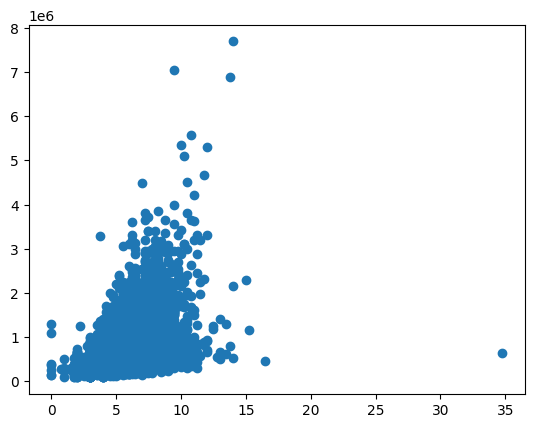

In [45]:
plt.scatter(df['total_rooms'],df['price'])

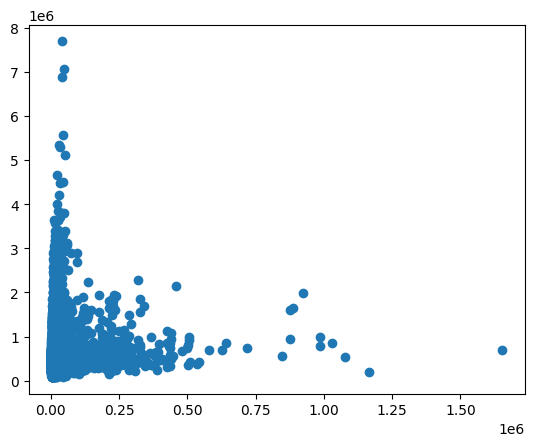

In [46]:
plt.scatter(df['total_sqft'],df['price'])

In [57]:
results = ols("price ~ total_rooms + age + view + grade", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     7306.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:35:23   Log-Likelihood:            -2.9836e+05
No. Observations:               21613   AIC:                         5.967e+05
Df Residuals:                   21608   BIC:                         5.968e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.456e+06   1.43e+04   -101.618      

In [58]:
"y_hat = -1456000 + 42390*total_rooms + 3596.2181*age + 92620*view + 203000*grade"

'y_hat = -1456000 + 42390*total_rooms + 3596.2181*age + 92620*view + 203000*grade'

In [ ]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,total_rooms,total_sqft,age
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,4.0,8010,68


In [59]:
df['grade'].head(1)

0    7
Name: grade, dtype: int64

In [60]:
-1456000 + 42390*4 + 3596.2181*68 + 92620*0 + 203000*7

379102.8308

In [61]:
pred_vals = results.predict(df[['total_rooms','age','view','grade']])

In [62]:
pred_vals

0        379624.668878
1        446992.101540
2        213345.574753
3        470820.631930
4        509941.581709
             ...      
21608    452017.806920
21609    476422.764388
21610    132446.329746
21611    469998.897567
21612    136042.547875
Length: 21613, dtype: float64

In [63]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [64]:
res

,y_hat,price
0,379624.668878,221900.0
1,446992.101540,538000.0
2,213345.574753,180000.0
3,470820.631930,604000.0
4,509941.581709,510000.0
...,...,...
21608,452017.806920,360000.0
21609,476422.764388,400000.0
21610,132446.329746,402101.0
21611,469998.897567,400000.0


In [65]:
res['error'] = res['y_hat'] - res['price']

In [66]:
res['sq_error'] = res['error']**2

In [67]:
np.sqrt(res['sq_error'].mean())

239360.74412856332

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 6.0000e+00,
        3.6000e+01, 1.4500e+02, 1.7670e+03, 1.9359e+04, 2.9200e+02]),
 array([-5398530.62293557, -4751501.02129599, -4104471.41965641,
        -3457441.81801684, -2810412.21637726, -2163382.61473768,
        -1516353.0130981 ,  -869323.41145852,  -222293.80981895,
          424735.79182063,  1071765.39346021]),
 <BarContainer object of 10 artists>)

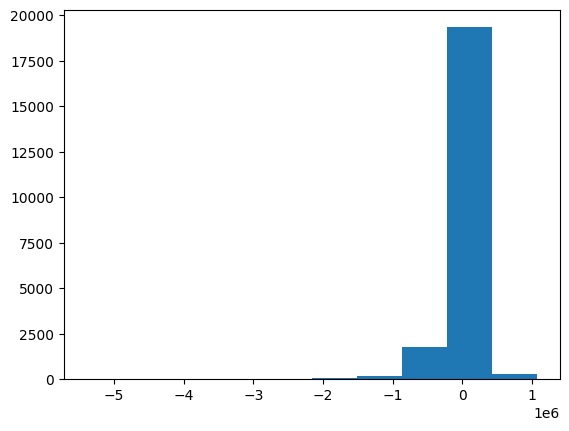

In [68]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

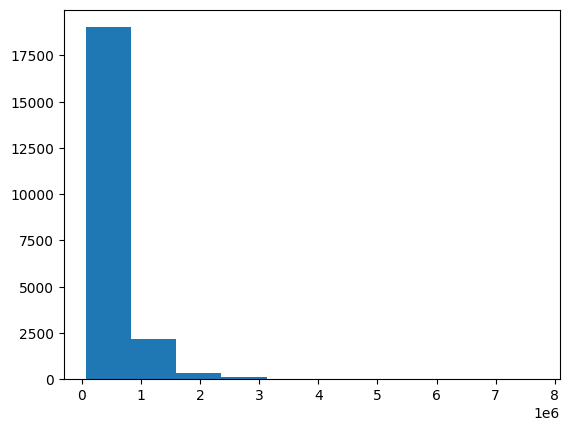

In [69]:
plt.hist(df['price'])

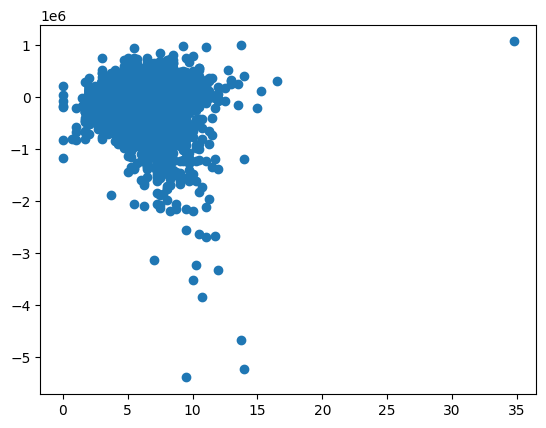

In [70]:
plt.scatter(df['total_rooms'],res['error'])

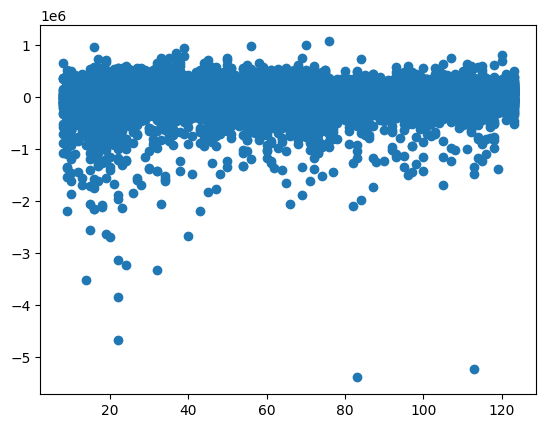

In [71]:
plt.scatter(df['age'],res['error'])

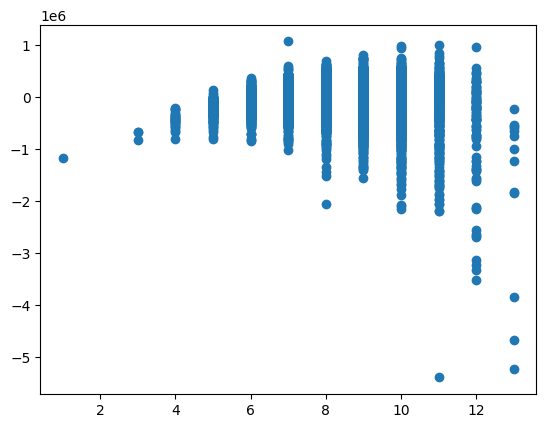

In [73]:
plt.scatter(df['grade'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-5398530.62293557, -5238767.77672893, -4669000.74244214, ...,
           980884.52677679,   997359.24587228,  1071765.39346021])),
 (212797.03907508813, -7.935757316862702e-08, 0.8888640498709935))

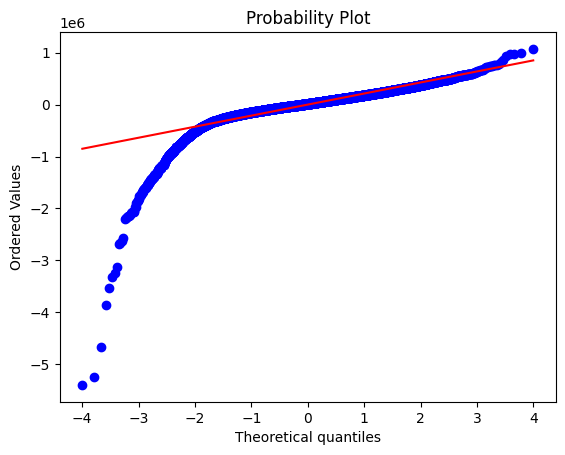

In [74]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [75]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_total_rooms       dfb_age      dfb_view   
0      -1.521531e-03         0.003521 -1.121437e-03  9.488828e-04  \
1       3.646792e-04         0.000710  1.446041e-03 -7.168207e-04   
2      -7.400622e-04         0.000914 -5.655011e-04  5.788601e-05   
3       1.353703e-03         0.006230  8.454647e-04 -8.312242e-04   
4       2.495142e-07        -0.000001 -8.106102e-07 -4.750911e-07   
...              ...              ...           ...           ...   
21608  -1.742407e-03         0.000982  3.372865e-03  3.470023e-04   
21609  -1.551631e-03        -0.000924  2.962619e-03  2.663666e-04   
21610   1.379273e-02        -0.016351 -1.547418e-02  1.797180e-03   
21611  -1.074514e-03         0.000690  2.175840e-03  3.396877e-04   
21612   9.529374e-03        -0.011427 -1.063256e-02  1.218430e-03   

          dfb_grade       cooks_d  standard_resid  hat_diag  dffits_internal   
0     -5.950030e-04  8.417208e-06       -0.658897  0.000097        -0.006487  \
1     -7.60

In [76]:
infl.summary_frame()

,dfb_Intercept,dfb_total_rooms,dfb_age,dfb_view,dfb_grade,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-1.521531e-03,0.003521,-1.121437e-03,9.488828e-04,-5.950030e-04,8.417208e-06,-0.658897,0.000097,-0.006487,-0.658888,-0.006487
1,3.646792e-04,0.000710,1.446041e-03,-7.168207e-04,-7.603486e-04,2.263328e-06,0.380183,0.000078,0.003364,0.380176,0.003364
2,-7.400622e-04,0.000914,-5.655011e-04,5.788601e-05,2.933496e-04,8.041871e-07,-0.139309,0.000207,-0.002005,-0.139306,-0.002005
3,1.353703e-03,0.006230,8.454647e-04,-8.312242e-04,-4.389675e-03,1.160842e-05,0.556384,0.000187,0.007619,0.556375,0.007618
4,2.495142e-07,-0.000001,-8.106102e-07,-4.750911e-07,7.273586e-07,1.011653e-12,0.000244,0.000085,0.000002,0.000244,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.742407e-03,0.000982,3.372865e-03,3.470023e-04,1.454117e-04,4.017831e-06,-0.384413,0.000136,-0.004482,-0.384406,-0.004482
21609,-1.551631e-03,-0.000924,2.962619e-03,2.663666e-04,1.106048e-03,3.301373e-06,-0.319268,0.000162,-0.004063,-0.319261,-0.004063
21610,1.379273e-02,-0.016351,-1.547418e-02,1.797180e-03,-9.576694e-04,1.041820e-04,1.126663,0.000410,0.022823,1.126670,0.022824
21611,-1.074514e-03,0.000690,2.175840e-03,3.396877e-04,-2.553605e-05,1.955201e-06,-0.292424,0.000114,-0.003127,-0.292418,-0.003127


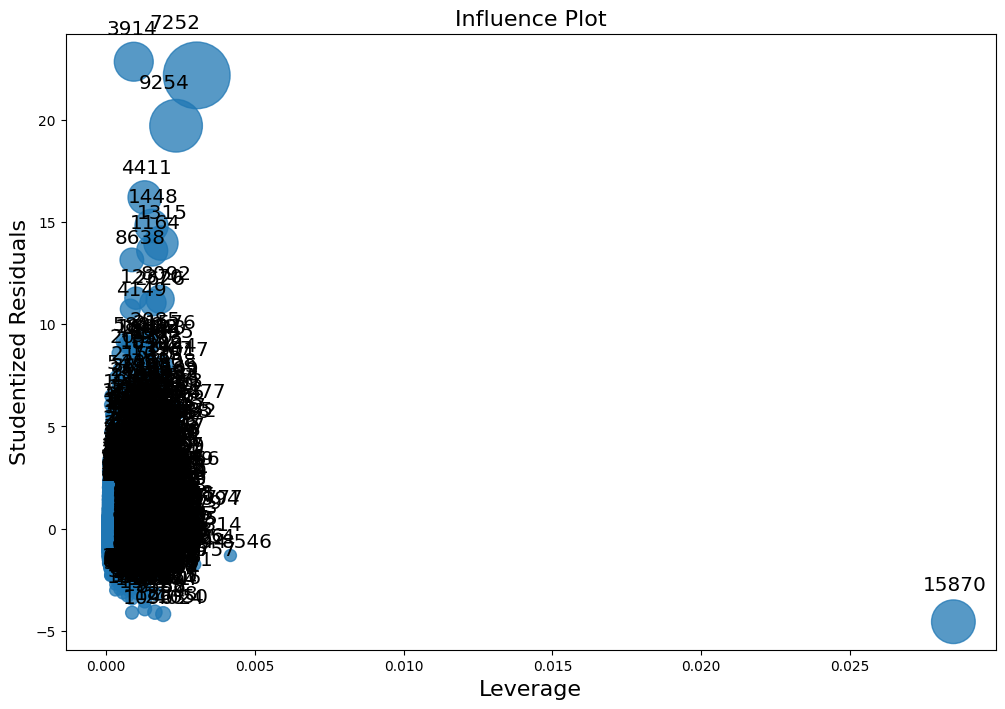

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [78]:
res

,y_hat,price,error,sq_error
0,379624.668878,221900.0,157724.668878,2.487707e+10
1,446992.101540,538000.0,-91007.898460,8.282438e+09
2,213345.574753,180000.0,33345.574753,1.111927e+09
3,470820.631930,604000.0,-133179.368070,1.773674e+10
4,509941.581709,510000.0,-58.418291,3.412697e+03
...,...,...,...,...
21608,452017.806920,360000.0,92017.806920,8.467277e+09
21609,476422.764388,400000.0,76422.764388,5.840439e+09
21610,132446.329746,402101.0,-269654.670254,7.271364e+10
21611,469998.897567,400000.0,69998.897567,4.899846e+09


In [79]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [80]:
dummies_view = pd.get_dummies(df.view, dtype=int)

In [84]:
dummies_view.rename(columns = {1:'bad view',2:'okay view',3:'good view',4:'excellent view'}, inplace = True)

In [85]:
df = pd.concat([df,dummies_view], axis=1)

In [86]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,0,bad view,okay view,good view,excellent view,0,bad view,okay view,good view,excellent view
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [98]:
daily_dataset = df.set_index('date').resample("3D").agg({'total_rooms':'mean','age':'mean','price':'mean','grade':'mean', 'view':'mean'}).ffill()

In [99]:
daily_dataset

,total_rooms,age,price,grade,view
date,,,,,
2014-05-02,5.506579,49.868421,5.264497e+05,7.828947,0.223684
2014-05-05,5.648077,53.684615,5.514311e+05,7.711538,0.161538
2014-05-08,5.485030,50.065868,5.303579e+05,7.724551,0.233533
2014-05-11,5.755952,51.976190,6.292102e+05,7.839286,0.220238
2014-05-14,5.438559,50.754237,5.092224e+05,7.720339,0.177966
...,...,...,...,...,...
2015-05-15,7.000000,63.000000,4.500000e+05,7.000000,0.000000
2015-05-18,7.000000,63.000000,4.500000e+05,7.000000,0.000000
2015-05-21,7.000000,63.000000,4.500000e+05,7.000000,0.000000


In [100]:
results = ols("price ~ total_rooms + age + view + grade", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           7.94e-39
Time:                        16:11:32   Log-Likelihood:                -1575.1
No. Observations:                 131   AIC:                             3160.
Df Residuals:                     126   BIC:                             3175.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.399e+06   1.63e+05    -14.681      

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [128]:
# separate features and target
categorical_features = ['view','grade']
numerical_features = ['age','total_rooms']
target = 'price'

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [131]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [132]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [133]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [134]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms'])])),
                ('regressor', LinearRegression())])

In [135]:
pred = linear_regression.predict(X_test)

In [136]:
pred

array([ 488720.31458442,  473052.35817249, 1387544.00843176, ...,
        472089.22062117,  498272.00295404,  343060.19645489])

In [137]:
np.sqrt(mean_squared_error(pred,y_test))

223646.04847870712

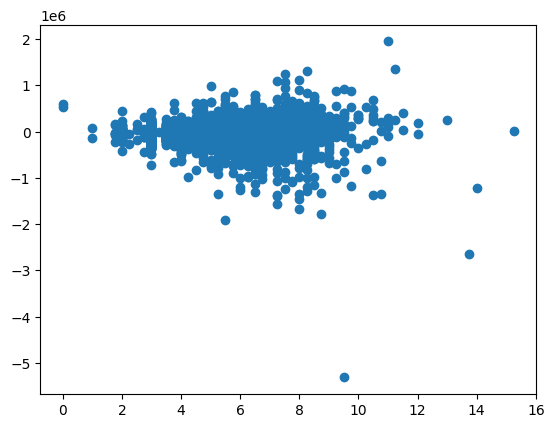

In [174]:
linear_pred_ = pd.concat([pd.DataFrame(pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
linear_pred_['res'] = linear_pred_['pred'] - linear_pred_['price']
plt.scatter(X_test['total_rooms'],linear_pred_['res'])

In [138]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [139]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [140]:
pred_ridge = ridge_regression.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

223422.26283594023

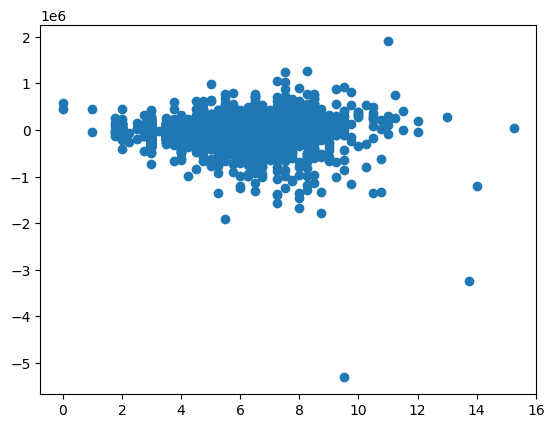

In [173]:
ridge_pred_ = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_pred_['res'] = ridge_pred_['pred'] - ridge_pred_['price']
plt.scatter(X_test['total_rooms'],ridge_pred_['res'])

In [142]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [143]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83810985901132.44, tolerance: 207065660607.36664
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms'])])),
                ('regressor', Lasso())])

In [144]:
lasso_pred = lasso_regression.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

223555.70097476235

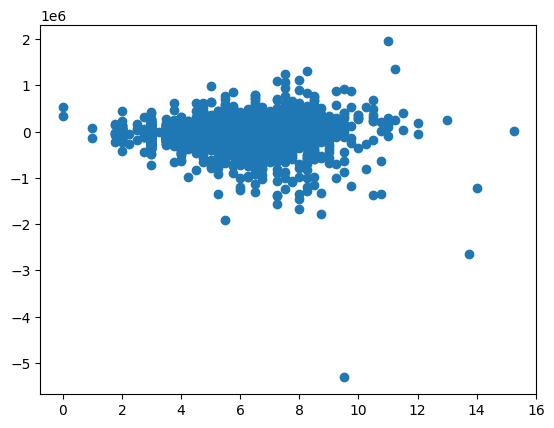

In [172]:
lasso_pred_ = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
lasso_pred_['res'] = lasso_pred_['pred'] - lasso_pred_['price']
plt.scatter(X_test['total_rooms'],lasso_pred_['res'])

In [146]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [147]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [148]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [149]:
elasticnet_pred

array([469769.09402222, 498259.61007308, 798230.25300176, ...,
       584567.32875819, 473539.45116172, 559941.91712748])

In [150]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

284322.56625571096

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

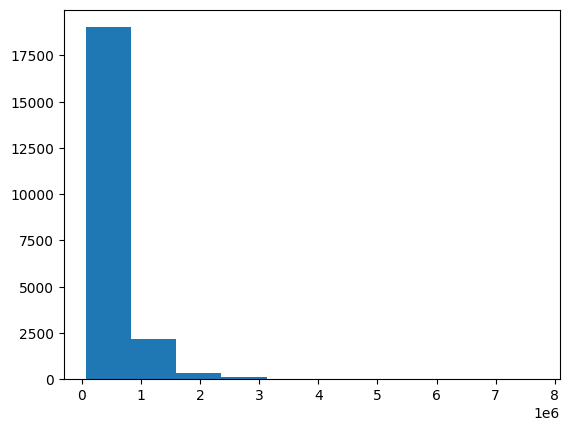

In [151]:
plt.hist(df['price'])

In [163]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [164]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [165]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [166]:
X_test

,view,grade,age,total_rooms
12432,0,8,47,4.75
7793,0,8,35,5.25
13435,0,11,23,7.75
1821,0,7,45,4.00
12449,0,8,29,6.50
...,...,...,...,...
2596,0,8,36,3.75
21161,0,8,10,5.50
20133,0,8,17,6.50
11130,0,8,50,4.75


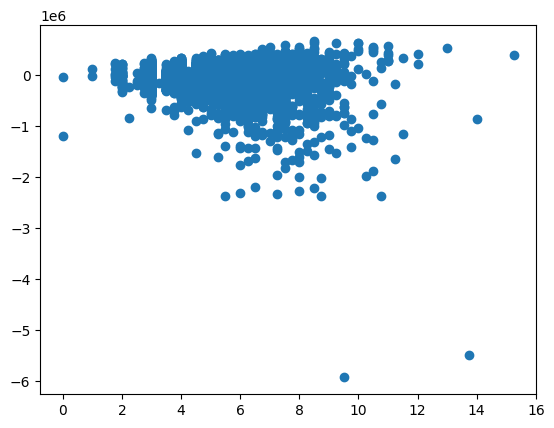

In [168]:
import matplotlib.pyplot as plt
plt.scatter(X_test['total_rooms'],elastic_net_pred['res'])

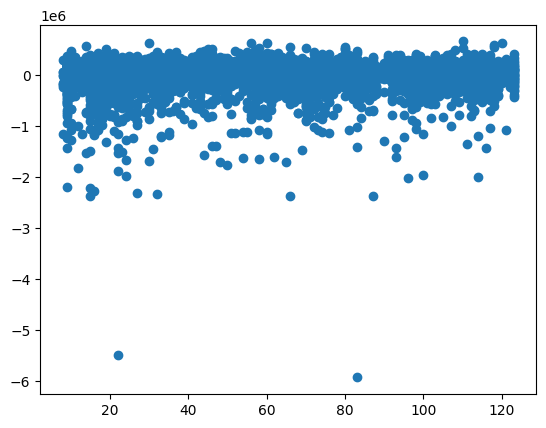

In [169]:
plt.scatter(X_test['age'],elastic_net_pred['res'])

In [160]:
input_data = pd.DataFrame({
    'total_rooms': [4],
    'view': [0],
    'grade': [7],
    'age': [68]
})

In [161]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,0,bad view,okay view,good view,excellent view,0,bad view,okay view,good view,excellent view
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [162]:
predicted_price = ridge_regression.predict(input_data)

print("Predicted house price:", predicted_price)

Predicted house price: [370958.63954892]
